In [1]:
import pandas as pd


In [33]:
cdf = pd.read_csv('/media/clisle/Backup Plus/terra/processing/terra-explore/output/s4_v1.csv')

In [34]:
cdf.head()

,cultivar,range,column,day,canopy_height,canopy_height_n,leaf_angle_alpha,leaf_angle_alpha_n,leaf_angle_beta,leaf_angle_beta_n,leaf_angle_chi,leaf_angle_chi_n,leaf_angle_mean,leaf_angle_mean_n
0,PI145619,27,11,12,10.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PI145619,27,11,13,10.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PI145619,27,11,14,10.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PI145619,27,11,15,10.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PI145619,27,11,16,10.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
cdf.tail()

,cultivar,range,column,day,canopy_height,canopy_height_n,leaf_angle_alpha,leaf_angle_alpha_n,leaf_angle_beta,leaf_angle_beta_n,leaf_angle_chi,leaf_angle_chi_n,leaf_angle_mean,leaf_angle_mean_n
35035,NaN,54,16,125,NaN,NaN,0.742627,2.0,0.978948,2.0,1.395465,2.0,0.538944,2.0
35036,NaN,54,16,126,NaN,NaN,1.081863,1.0,1.123726,1.0,1.645108,1.0,0.493229,1.0
35037,NaN,54,16,128,NaN,NaN,1.318698,1.0,1.315653,1.0,1.592671,1.0,0.496372,1.0
35038,NaN,54,16,129,NaN,NaN,1.342349,2.0,1.283948,2.0,1.646410,2.0,0.485663,2.0
35039,NaN,54,16,132,NaN,NaN,2.355351,2.0,1.829197,2.0,1.707480,2.0,0.452373,2.0


In [36]:
unique_counts = pd.DataFrame.from_records([(col, cdf[col].nunique()) for col in cdf.columns],
                          columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])

In [37]:
unique_counts

,Column_Name,Num_Unique
5,canopy_height_n,4
7,leaf_angle_alpha_n,5
9,leaf_angle_beta_n,5
11,leaf_angle_chi_n,5
13,leaf_angle_mean_n,5
2,column,15
1,range,53
3,day,75
0,cultivar,270
4,canopy_height,407


For simplicity in modeling, drop any rows or columns that contain NA values.  For example, there were 94 measurements that didn't have cultivar values. 

In [38]:
cdf = cdf.dropna(how="any")
pd.DataFrame.from_records([(col, cdf[col].nunique()) for col in cdf.columns],
                          columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])

,Column_Name,Num_Unique
7,leaf_angle_alpha_n,3
9,leaf_angle_beta_n,3
11,leaf_angle_chi_n,3
13,leaf_angle_mean_n,3
5,canopy_height_n,4
2,column,13
3,day,42
1,range,50
0,cultivar,269
4,canopy_height,292


In [39]:
cdf['cultivar_index'] = cdf['cultivar'].astype('category')

In [41]:
# now we convert the "string-ish" values of the categorical variable into their integer indices
cdf['cultivar_index'] = cdf['cultivar_index'].cat.codes

In [42]:
cdf.head()

,cultivar,range,column,day,canopy_height,canopy_height_n,leaf_angle_alpha,leaf_angle_alpha_n,leaf_angle_beta,leaf_angle_beta_n,leaf_angle_chi,leaf_angle_chi_n,leaf_angle_mean,leaf_angle_mean_n,cultivar_index
33,PI145619,27,11,77,289.0,1.0,3.501112,1.0,2.250611,1.0,1.822136,1.0,0.429758,1.0,0
34,PI145619,27,11,78,288.0,1.0,3.936643,1.0,2.386776,1.0,1.892378,1.0,0.409214,1.0,0
35,PI145619,27,11,80,285.0,1.0,2.948751,1.0,1.930459,1.0,1.870285,1.0,0.420650,1.0,0
36,PI145619,27,11,83,280.0,1.0,2.966654,1.0,2.013383,1.0,1.807524,1.0,0.432626,1.0,0
37,PI145619,27,11,84,291.0,1.0,3.135967,2.0,1.992641,2.0,1.892911,2.0,0.413790,2.0,0


In [43]:
cdf.tail()

,cultivar,range,column,day,canopy_height,canopy_height_n,leaf_angle_alpha,leaf_angle_alpha_n,leaf_angle_beta,leaf_angle_beta_n,leaf_angle_chi,leaf_angle_chi_n,leaf_angle_mean,leaf_angle_mean_n,cultivar_index
31317,PI92270,29,6,85,278.0,1.0,1.088809,2.0,1.409389,2.0,1.306647,2.0,0.558613,2.0,268
31319,PI92270,29,6,109,277.0,1.0,1.136455,2.0,1.378603,2.0,1.350038,2.0,0.542435,2.0,268
31320,PI92270,29,6,111,277.0,1.0,1.309343,2.0,1.464428,2.0,1.415636,2.0,0.526072,2.0,268
31321,PI92270,29,6,113,277.0,1.0,1.185605,2.0,1.418133,2.0,1.350082,2.0,0.540151,2.0,268
31322,PI92270,29,6,118,275.0,1.0,1.192962,2.0,1.481122,2.0,1.309188,2.0,0.550471,2.0,268


Try a decision tree regression model

In [44]:
# prepare the dataset
# split the inputs and the target feature.  They will stay aligned because of the index value in pandas.
train_df = cdf[['cultivar_index','day','range','column','leaf_angle_alpha','leaf_angle_beta','leaf_angle_chi']]
target_df = cdf['canopy_height']

In [45]:
train_df.head()

,cultivar_index,day,range,column,leaf_angle_alpha,leaf_angle_beta,leaf_angle_chi
33,0,77,27,11,3.501112,2.250611,1.822136
34,0,78,27,11,3.936643,2.386776,1.892378
35,0,80,27,11,2.948751,1.930459,1.870285
36,0,83,27,11,2.966654,2.013383,1.807524
37,0,84,27,11,3.135967,1.992641,1.892911


In [46]:
target_df.head()

33    289.0
34    288.0
35    285.0
36    280.0
37    291.0
Name: canopy_height, dtype: float64

In [47]:
X_train = train_df.values
y_train = target_df.values
print(X_train.shape)
print(y_train.shape)

(8355, 7)
(8355,)


In [89]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

tree = DecisionTreeRegX_trainressor(max_depth=8).fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

pred_tree = tree.predict(X_train)
pred_lr = linear_reg.predict(X_train)



In [90]:
pred_tree

array([255.3591954 , 255.3591954 , 274.78648069, ..., 306.93292683,
       306.93292683, 306.93292683])

In [51]:
cdf['pred_tree'] = pred_tree
cdf['pred_linear'] = pred_lr
cdf.head()

,cultivar,range,column,day,canopy_height,canopy_height_n,leaf_angle_alpha,leaf_angle_alpha_n,leaf_angle_beta,leaf_angle_beta_n,leaf_angle_chi,leaf_angle_chi_n,leaf_angle_mean,leaf_angle_mean_n,cultivar_index,pred_tree,pred_linear
33,PI145619,27,11,77,289.0,1.0,3.501112,1.0,2.250611,1.0,1.822136,1.0,0.429758,1.0,0,254.259194,228.258868
34,PI145619,27,11,78,288.0,1.0,3.936643,1.0,2.386776,1.0,1.892378,1.0,0.409214,1.0,0,254.259194,233.261709
35,PI145619,27,11,80,285.0,1.0,2.948751,1.0,1.930459,1.0,1.870285,1.0,0.420650,1.0,0,281.134450,241.077641
36,PI145619,27,11,83,280.0,1.0,2.966654,1.0,2.013383,1.0,1.807524,1.0,0.432626,1.0,0,281.134450,245.426839
37,PI145619,27,11,84,291.0,1.0,3.135967,2.0,1.992641,2.0,1.892911,2.0,0.413790,2.0,0,281.134450,253.058574


plot all the values. this won't look right because many cultivars with different heights are recorded on the same day.  We are plotting the actual, the decisionTreeRegressor and the LinearRegression predictions.

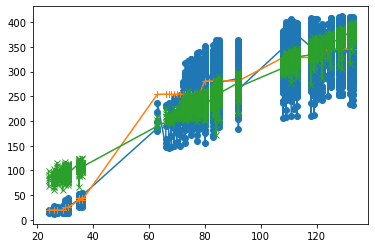

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
sorted_df = cdf.sort_values(by=['day'])
plotx = sorted_df['day'].values
ploty = sorted_df['canopy_height'].values
ploty_tree = sorted_df['pred_tree'].values
ploty_lr = sorted_df['pred_linear'].values
plt.plot(plotx,ploty,marker="o")
plt.plot(plotx,ploty_tree , marker="+")
plt.plot(plotx,ploty_lr , marker="x")

pick particular cultivars to explore the model fit

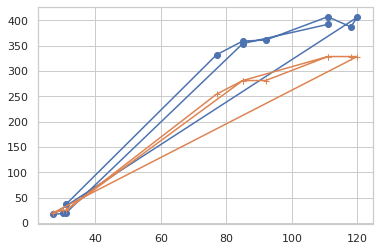

In [78]:
def plot_cultivar(fulldf,cultivar):
    df = fulldf.loc[fulldf['cultivar'] == cultivar]
    plotx = df['day'].values
    ploty = df['canopy_height'].values
    ploty_tree = df['pred_tree'].values
    ploty_lr = df['pred_linear'].values
    plot_labels = df['cultivar'].values
    plt.plot(plotx,ploty , marker="o")
    plt.plot(plotx,ploty_tree , marker="+")
    #plt.plot(plotx,ploty_lr , marker="x")

#plot_cultivar(cdf,'PI145619')
plot_cultivar(cdf,'PI569453')

(7, 17)


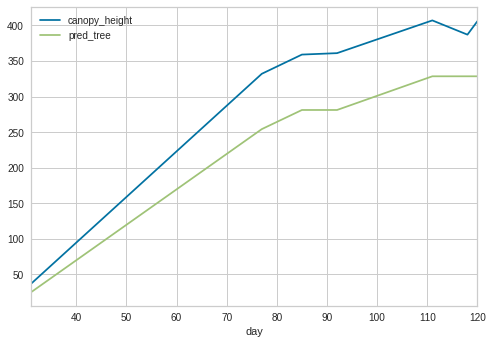

In [126]:
def plot_cultivar(fulldf,cultivar):
    df = fulldf.loc[fulldf['cultivar'] == cultivar]
    df = df.loc[df['column']==9]
    print(df.shape)
    df = df[['day','canopy_height','pred_tree']]
    df = df.set_index('day')
    df.plot()

#plot_cultivar(cdf,'PI145619')
plot_cultivar(cdf,'PI569453')

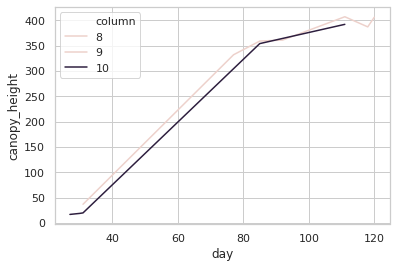

In [77]:
import seaborn as sns
sns.set(style="whitegrid")

# Load the example exercise dataset
df = cdf.loc[cdf['cultivar'] == 'PI569453']
#df = df.loc[df['range'] == 40]

sns.lineplot(x="day", y="canopy_height",
             hue="column", 
             data=df)

In [63]:
df.head()

,cultivar,range,column,day,canopy_height,canopy_height_n,leaf_angle_alpha,leaf_angle_alpha_n,leaf_angle_beta,leaf_angle_beta_n,leaf_angle_chi,leaf_angle_chi_n,leaf_angle_mean,leaf_angle_mean_n,cultivar_index,pred_tree,pred_linear
33,PI145619,27,11,77,289.0,1.0,3.501112,1.0,2.250611,1.0,1.822136,1.0,0.429758,1.0,0,254.259194,228.258868
34,PI145619,27,11,78,288.0,1.0,3.936643,1.0,2.386776,1.0,1.892378,1.0,0.409214,1.0,0,254.259194,233.261709
35,PI145619,27,11,80,285.0,1.0,2.948751,1.0,1.930459,1.0,1.870285,1.0,0.420650,1.0,0,281.134450,241.077641
36,PI145619,27,11,83,280.0,1.0,2.966654,1.0,2.013383,1.0,1.807524,1.0,0.432626,1.0,0,281.134450,245.426839
37,PI145619,27,11,84,291.0,1.0,3.135967,2.0,1.992641,2.0,1.892911,2.0,0.413790,2.0,0,281.134450,253.058574


In [64]:
pd.DataFrame.from_records([(col, df[col].nunique()) for col in df.columns],
                          columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])

,Column_Name,Num_Unique
0,cultivar,1
14,cultivar_index,1
1,range,2
2,column,3
7,leaf_angle_alpha_n,3
9,leaf_angle_beta_n,3
13,leaf_angle_mean_n,3
11,leaf_angle_chi_n,3
5,canopy_height_n,4
15,pred_tree,6


In [111]:
from sklearn.linear_model import Ridge
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [116]:
train_df = cdf[['cultivar_index','day','range','column','leaf_angle_alpha','leaf_angle_beta','leaf_angle_chi']]
target_df = cdf['canopy_height']
X = train_df.values
y = target_df.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True,random_state=42)

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

tree = DecisionTreeRegressor(max_depth=6).fit(X_train_scaled, y_train)

0.8998574688234761

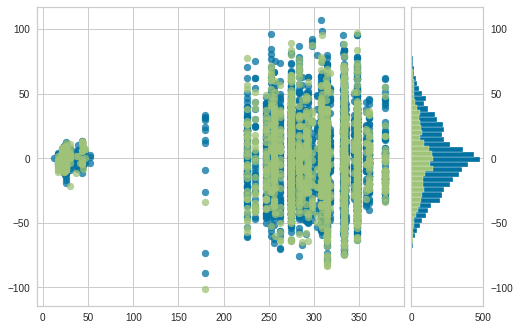

In [117]:

# Instantiate the visualizer
visualizer = ResidualsPlot(tree)

visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
#visualizer.show()                 # Finalize and render the figure

In [114]:
df = cdf.loc[cdf['cultivar'] == 'PI569453']
df = df.loc[df['range'] == 40]
df = df.loc[df['column'] == 9]
train_df = df[['cultivar_index','day','range','column','leaf_angle_alpha','leaf_angle_beta','leaf_angle_chi']]
target_df = df['canopy_height']
X = train_df.values
y = target_df.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True,random_state=42)

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

tree = DecisionTreeRegressor(max_depth=6).fit(X_train_scaled, y_train)

In [113]:
X_train,X_train_scaled

(array([[192.        , 118.        ,  40.        ,   9.        ,
           1.07966085,   1.32396188,   1.36806632],
        [192.        ,  85.        ,  40.        ,   9.        ,
           1.59733526,   1.80223889,   1.37312498],
        [192.        , 111.        ,  40.        ,   9.        ,
           1.06776453,   1.28671625,   1.38588205],
        [192.        ,  92.        ,  40.        ,   9.        ,
           1.49767722,   1.52135115,   1.50155002],
        [192.        , 120.        ,  40.        ,   9.        ,
           1.15253226,   1.33402587,   1.41578142]]),
 array([[0.        , 0.94285714, 0.        , 0.        , 0.02246409,
         0.0722483 , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 1.        ,
         1.        , 0.0378972 ],
        [0.        , 0.74285714, 0.        , 0.        , 0.        ,
         0.        , 0.13346745],
        [0.        , 0.2       , 0.        , 0.        , 0.81181355,
         0.45513986, 1.        ],
 

-1.5121286986498133

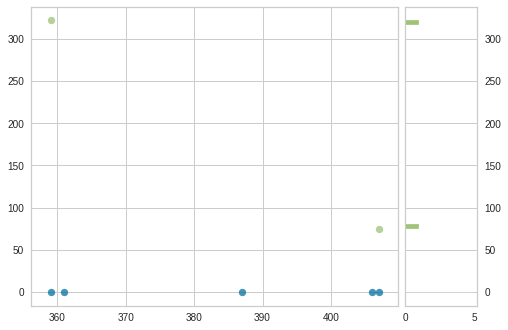

In [115]:

# Instantiate the visualizer
visualizer = ResidualsPlot(tree)

visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
#visualizer.show()                 # Finalize and render the figure

Try ARiMA model
http://www.statsmodels.org/devel/examples/notebooks/generated/tsa_arma_1.html

-1.4021832806664754

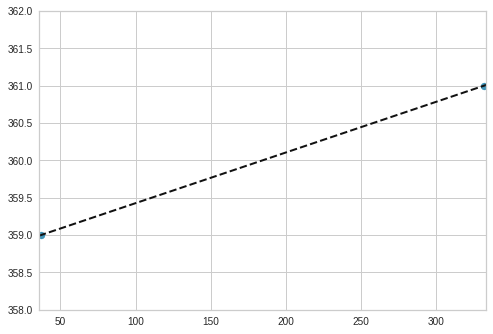

In [107]:
from yellowbrick.regressor import PredictionError
visualizer2 = PredictionError(tree)

visualizer2.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer2.score(X_test, y_test)  # Evaluate the model on the test data
#visualizer2.show()                 # Finalize and render the figure

In [12]:
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.arima_process import arma_generate_sample
np.random.seed(12345)

In [ ]:
y = pd.Series(cdf['canopy_height'], index=)
arma_mod = sm.tsa.ARMA(y, order=(2,2))
arma_res = arma_mod.fit(trend='nc', disp=-1)

In [ ]:
# A simple way to use SARIMAX from statsmodels
def sarima_forecast(history, order, sorder, trend):
    model = SARIMAX(history, order=order, seasonal_order=sorder, trend=trend,
      enforce_stationarity=False, enforce_invertibility=False)
    # fit model
    model_fit = model.fit(disp=False)
    # make one step forecast
    yhat = model_fit.predict(len(history), len(history))
    return yhat[0]

try Facebook Prophet
https://pythondata.com/forecasting-time-series-data-with-prophet-part-1/